In [17]:
import	csv
import	matplotlib.pyplot as plt
import koreanize_matplotlib
import platform

## 시간대별 지하철 이용 인원 수

In [8]:
result = []
total_number = 0
with open("subwaytime.csv", encoding="utf-8") as f:
    data = csv.reader(f)
    next(data) # 헤더가 2줄이라 건너뜀
    next(data)
    for row in data:
        row[4:] = map(int, row[4:]) #문자열을 숫자로 
        total_number += row[4]
        result.append(row[4])

print(f'총 지하철 역의 수:	{len(result)}')
print(f'새벽 4시 승차인원:	{total_number:,}')

총 지하철 역의 수:	621
새벽 4시 승차인원:	133,185


## 새벽 4시 지하철 이용 인원 수 (그래프`)

새벽 4시 승차인원:	133,185
최대 승차역: 구로, 인원수: 10,986


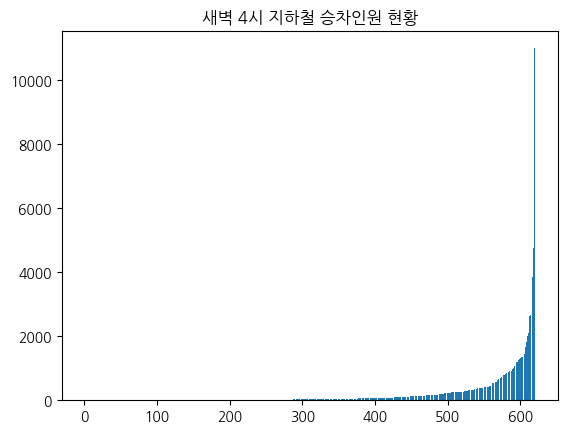

In [11]:
with open("subwaytime.csv", encoding="utf-8") as f:
    data = csv.reader(f)
    next(data) # 헤더가 2줄이라 건너뜀
    next(data)
    result = []
    total_number = 0
    
    max_num = -1
    max_station = ""
    
    for row in data:
        row[4:] = map(int, row[4:]) #문자열을 숫자로 
        total_number += row[4]
        result.append(row[4])
        if row[4] > max_num:
            max_num = row[4]
            max_station = row[3]

print('새벽 4시 승차인원:	{0:,}'.format(total_number))
print('최대 승차역: {0}, 인원수: {1:,}'.format(max_station, max_num))
result.sort()
plt.figure(dpi=100)
plt.bar(range(len(result)), result)
plt.title("새벽 4시 지하철 승차인원 현황")
plt.show()

## 출근 시간대 지하철 이용 현황

최대 승차 인원역:	신림(2호선)	576,994


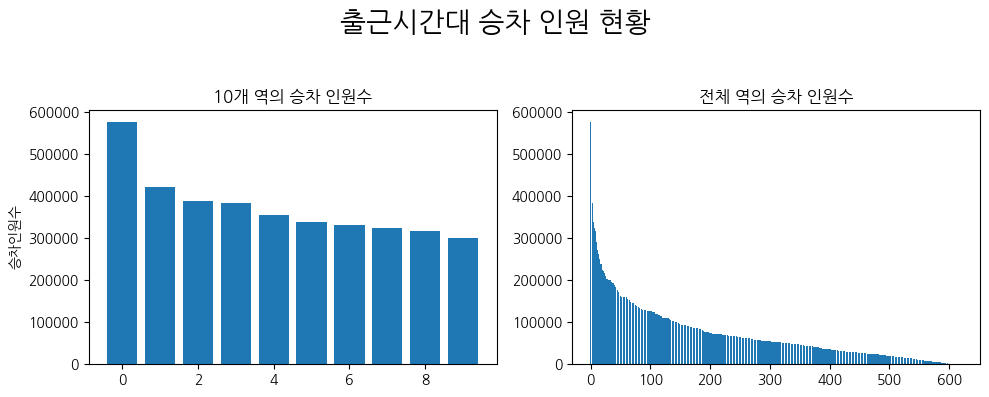

In [16]:
with open("subwaytime.csv", encoding="utf-8") as f:
    data = csv.reader(f)
    next(data) # 헤더가 2줄이라 건너뜀
    next(data)
    result = []
    total_number = 0
    
    max_num = -1
    max_station = ""
    
    for row in data:
        row[4:] = map(int, row[4:]) #문자열을 숫자로 
        row_sum = sum(row[10:15:2])

        result.append(row_sum)
        
        if row_sum > max_num:
            max_num = row_sum
            max_station = row[3] + "(" + row[1] + ")"

print(f'최대 승차 인원역:	{max_station}	{max_num:,}')
result.sort(reverse=True)

# 그래프 그리기
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1, 2 ,1)
plt.title("10개 역의 승차 인원수", size = 12)
plt.bar(range(10), result[0:10])
plt.ylabel("승차인원수")

ax2 = plt.subplot(1, 2 ,2)
plt.title("전체 역의 승차 인원수", size = 12)
plt.bar(range(len(result)), result)

plt.suptitle("출근시간대 승차 인원 현황\n", size=20)
plt.tight_layout()
plt.show()

## 시간대별 가장 많이 승차하는 역 정보 분석

[max_station[i]]: 10,986
[max_station[i]]: 36,908
[max_station[i]]: 64,151
[max_station[i]]: 168,672
[max_station[i]]: 250,796
[max_station[i]]: 157,526
[max_station[i]]: 94,494
[max_station[i]]: 92,035
[max_station[i]]: 103,606
[max_station[i]]: 116,176
[max_station[i]]: 135,787
[max_station[i]]: 166,370
[max_station[i]]: 195,705
[max_station[i]]: 246,610
[max_station[i]]: 298,236
[max_station[i]]: 200,483
[max_station[i]]: 209,945
[max_station[i]]: 216,017
[max_station[i]]: 212,376
[max_station[i]]: 110,986
[max_station[i]]: 16,352
[max_station[i]]: 1,638
[max_station[i]]: 13


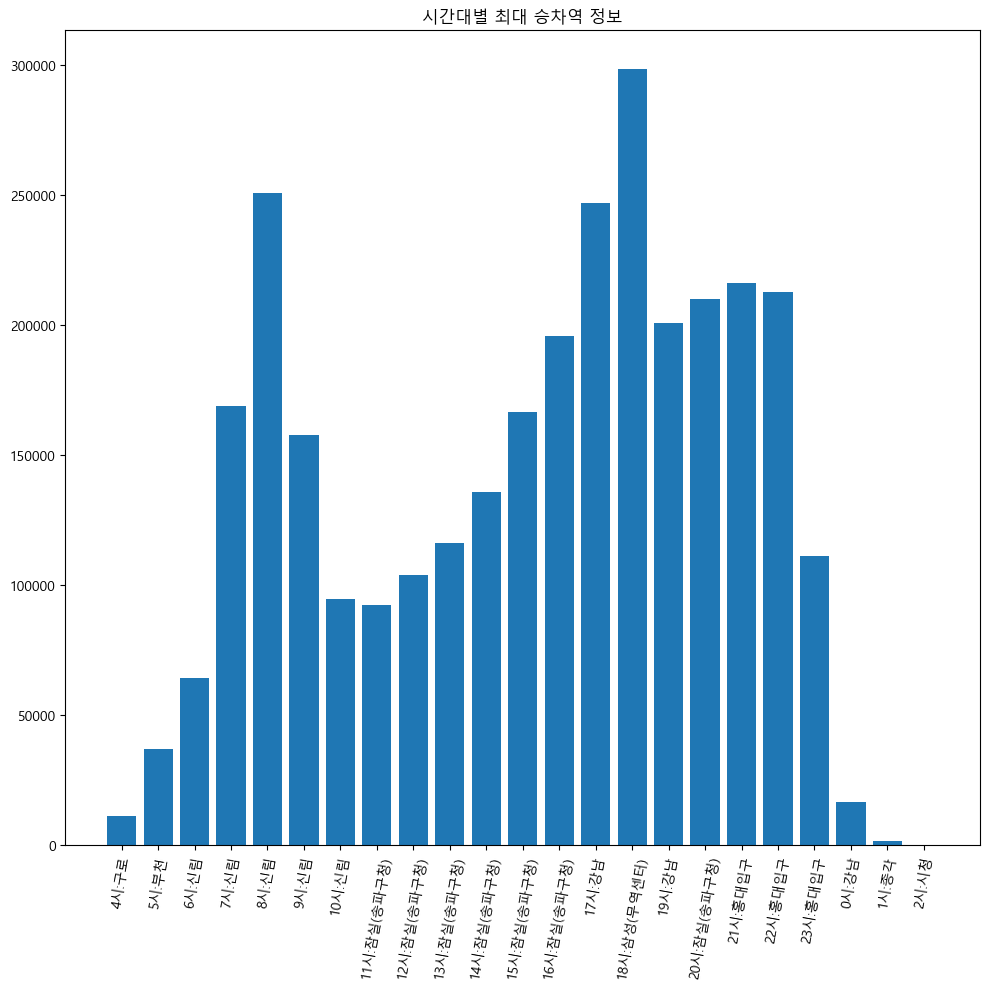

In [19]:
with open("subwaytime.csv", encoding="utf-8") as f:
    data = csv.reader(f)
    next(data) # 헤더가 2줄이라 건너뜀
    next(data)
    
    # 3시부터 4시까지 차 없음
    max = [0] * 23
    max_station = [""] * 23
    xtick_list = []

    for i in range(4, 27):
        n = i % 24
        xtick_list.append(str(n)) # x축 tick을 4 5 6 7... 0, 1, 2로 표기위함

    for row in data:
        row[4:] = map(int, row[4:])
        for j in range(23):
            a = row[j * 2 + 4]
            if a > max[j]:
                max[j] = a
                max_station[j] = xtick_list[j] + "시:" + row[3]

    for i in range(len(max)):
        print(f"[max_station[i]]: {max[i]:,}")
        

# 그래프 그리기
if (platform.system() == "Windows"):
    plt.rc("font", family = "Malgun Gothic")
else:
    plt.rc("font", family = "Malgun Gothic")

plt.figure(figsize=(10, 10))
plt.title("시간대별 최대 승차역 정보")
plt.bar(range(23), max)
plt.xticks(range(23), labels=max_station, rotation=80)
plt.tight_layout()
plt.show()

## 고양이 : 모든 지하철역에서 시간대별 승하차 인원

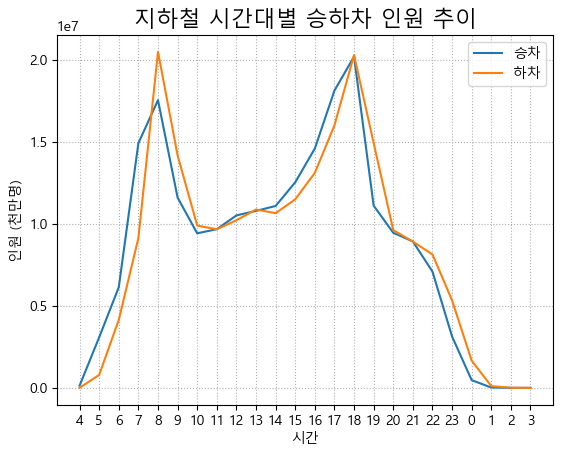

In [29]:
with open("subwaytime.csv", encoding="utf-8") as f:
    data = csv.reader(f)
    next(data) # 헤더가 2줄이라 건너뜀
    next(data)
    subway_in = [0] * 24
    subway_out = [0] * 24
        
    for row in data:
        row[4:] = map(int, row[4:])
        # print(row)
        for i in range(24): #
            subway_in[i] += row[4+i*2] # 2칸씩 간주점프^~^ 
            subway_out[i] += row[5+i*2]
# 그래프 그리기        
    if (platform.system() == "Windows"):
        plt.rc("font", family = "Malgun Gothic")
    else:
        plt.rc("font", family = "Malgun Gothic")
xtick_list = []
for i in range(4, 28):
    n = i%24
    xtick_list.append(str(n))

plt.figure(dpi = 100)
plt.title("지하철 시간대별 승하차 인원 추이", size=16)
plt.grid(linestyle=":")
plt.plot(subway_in, label = "승차")
plt.plot(subway_out, label = "하차")
plt.legend()

plt.xticks(range(24), labels=xtick_list)
plt.xlabel("시간")
plt.ylabel("인원 (천만명)")
plt.show()